# Experiment 4: Gray Level Transformation Image Enhancement Techniques

In [1]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('Images/road.bmp', cv2.IMREAD_GRAYSCALE)

## Image Negative

In [2]:
# Negative Transformation
L = max(image.ravel()) + 1
inverted = (L-1) - image

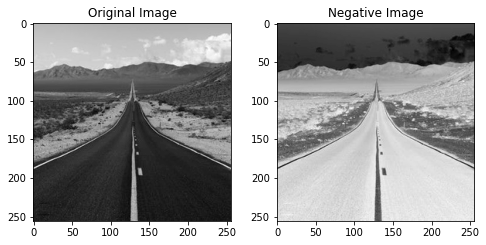

In [3]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(inverted, cmap='gray')
ax2.title.set_text('Negative Image')
plt.show()

## Log Transformation

In [4]:
# Log Transformation
c = round(255 / np.log(1 + np.max(image)), 2)
log_image = c * (np.log(image)) 
log_image = np.array(log_image, dtype = np.uint8) 

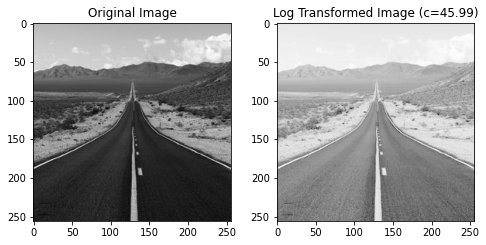

In [5]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(log_image, cmap='gray')
ax2.title.set_text(f'Log Transformed Image (c={c})')
plt.show()

## Gamma Transformation

In [6]:
# Gamma (Power-Law) Transformation
c = 2 # Constant Value
gamma_value = 0.5
gamma_image = c * (image ** gamma_value)

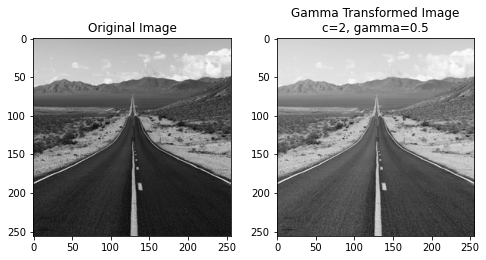

In [7]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(gamma_image, cmap='gray')
ax2.title.set_text(f'Gamma Transformed Image\nc={c}, gamma={gamma_value}')
plt.show()

## Piecewise - Linear Transformation<br>Contrast Stretching

In [8]:
# Parameters
r1, s1 = 70, 0
r2, s2 = 140, 255

In [9]:
# Perform Contrast Stretching
pixels = image.ravel()
cs = []
for pixel in pixels:
    if pixel >= 0 and pixel <= r1:
        new_pixel = (s1 / r1) * pixel
    elif pixel > r1 and pixel <= r2:
        new_pixel = ((s2 - s1)/(r2 - r1)) * (pixel - r1) + s1
    else:
        new_pixel = ((255 - s2)/(255 - r2)) * (pixel - r2) + s2 
    cs.append(new_pixel)

contrast_stretched = np.array(cs)
contrast_stretched = contrast_stretched.reshape(image.shape)

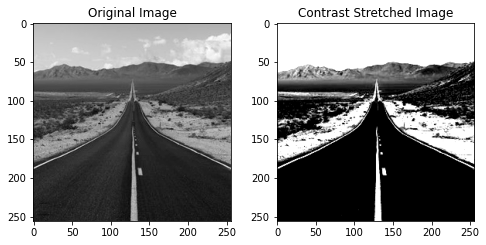

In [10]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(contrast_stretched, cmap='gray')
ax2.title.set_text('Contrast Stretched Image')
plt.show()

## Intensity Level Slicing

In [11]:
# Parameters
min_range = 10
max_range = 60

In [12]:
# Perform Intensity Level Slicing
pixels = image.ravel()
sliced_image = np.array([])
for pixel in pixels:
    if pixel > min_range and pixel < max_range:
        sliced_image = np.append(sliced_image, 255)
    else:
        sliced_image = np.append(sliced_image, 0)
sliced_image = sliced_image.reshape(image.shape)

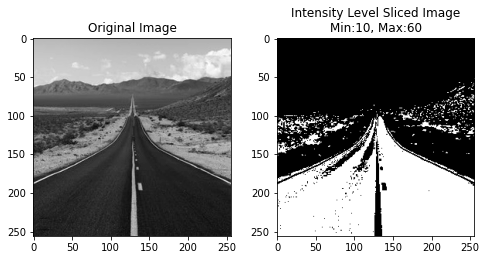

In [13]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(sliced_image, cmap='gray')
ax2.title.set_text(f'Intensity Level Sliced Image\nMin:{min_range}, Max:{max_range}')
plt.show()

Siddhartha Dutta<br>
A70405217037<br>
8th September, 2020